executedexecutedexecuted# Exercise 2

## 2.1 Given Fractal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

if(not os.path.exists('build')):
    os.makedirs('build')

In [3]:
def L(x,y,a,b,c,d,e,f):
    x_new = a * x + b * y + e
    y_new = c * x + d * y + f
    return (x_new, y_new)

def L1(x,y):
    a = 0
    b = 0
    c = 0
    d = .16
    e = 0
    f = 0
    return L(x,y,a,b,c,d,e,f)

def L2(x,y):
    a = .2
    b = -0.26
    c = .23
    d = .22
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def L3(x,y):
    a = -.15
    b = .28
    c = .26
    d = .24
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def L4(x,y):
    a = .85
    b = .04
    c = -.04
    d = .85
    e = 0
    f = .2
    return L(x,y,a,b,c,d,e,f)

def step(x,y):
    random_number = np.random.rand()
    p1 = .01
    p2 = .07
    p3 = .07
    p4 = .85
    if (random_number < p1):
        return L1(x,y)
    if (random_number < p1 + p2):
        return L2(x,y)
    if (random_number < p1 + p2 + p3):
        return L3(x,y)
    return L4(x,y)

In [4]:
history = [(0,0)]

for _ in range(1000000):
    x, y = history[-1]
    x_new, y_new = step(x,y)
    history.append((x_new, y_new))

    
history = np.array(history)

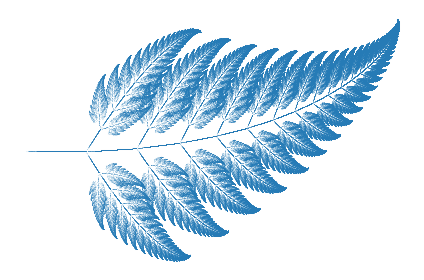

In [5]:
plt.scatter(history[:,1], history[:,0],s=.001)
plt.axis('off')
plt.tight_layout()
plt.savefig('build/my_rebuild.png')

## 2.3 Fractal dimension

In [6]:
def is_in_box(point,left,right,top,bottom):
    x,y = point
    if y < bottom or y > top:
        return False
    if x < left or x > right:
        return False
    return True

def any_is_in_box(data,left,right,top,bottom):
    for point in data:
        if(is_in_box(point, left,right,top,bottom)):
            return True
    return False

def count_box(data, n_sqrt, height, width):
    height_box = height / n_sqrt
    width_box = width / n_sqrt
    left = -1/2 * width
    right = left + width_box
    top = height / 2
    bottom = top - height
    
    boxes_filled = 0
    
    for _ in range(n_sqrt**2): # iterate rows
        for _ in range(n_sqrt**2): # iterate columns
            if (any_is_in_box,left, right, top, bottom):
                boxes_filled += 1
            left += width_box
            right += width_box
        left = -1/2 * width
        rigth = left + width_box
        top += height_box
        bottom += height_box
    
    return boxes_filled, n_sqrt**2


In [7]:
boxes = []
for i in range(3,50):
    boxes.append(count_box(history, i, 1, 3))
boxes = np.array(boxes)

In [8]:
boxes_total = boxes[:,0]
boxes_filled = boxes[:,1]
fraction_filled = boxes_filled / boxes_total

In [9]:
def exponential(x,exponent, factor):
    return factor * x ** exponent


popt, pcov = curve_fit(exponential, boxes_total, boxes_filled)

exponent, factor = popt

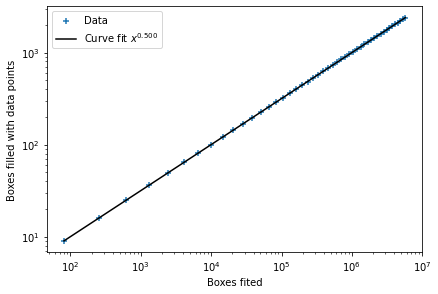

In [10]:
plt.clf()
plt.scatter(boxes_total, boxes_filled,
           label='Data',
           marker='+')
plt.plot(boxes_total, exponential(boxes_total, exponent, factor),
         label=rf'Curve fit $x^{{{exponent:.3f}}}$',
         color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.xlabel('Boxes fited')
plt.ylabel('Boxes filled with data points')

plt.savefig('build/fractal_dimension.png')

## Now the same Spaß for my own fractal

In [11]:
def L(x,y,a,b,c,d,e,f):
    x_new = a * x + b * y + e
    y_new = c * x + d * y + f
    return (x_new, y_new)

# move to the right
def L1(x,y):
    a = .7
    b = 0
    c = 1
    d = 0
    e = .3
    f = 0
    return L(x,y,a,b,c,d,e,f)

# radially going in
def L2(x,y):
    a = .99
    b = 0
    c = 0
    d = .99
    e = 0
    f = 0
    return L(x,y,a,b,c,d,e,f)

# .1 degree rotation
def L3(x,y):
    theta = .1 *  2 * np.pi / 360 # 1 degree
    a = np.cos(theta)
    b = np.sin(theta)
    c = -1 * np.sin(theta)
    d = np.cos(theta)
    e = 0
    f = 0
    return L(x,y,a,b,c,d,e,f)

# 0.1 degree rotation
def L4(x,y):
    theta = 2 * np.pi / 3600 # 30 degree
    a = np.cos(theta)
    b = np.sin(theta)
    c = -1 * np.sin(theta)
    d = np.cos(theta)
    e = 0
    f = 0
    return L(x,y,a,b,c,d,e,f)


def step(x,y):
    random_number = np.random.rand()
    p1 = .02
    p2 = .1
    p3 = .88
    #p4 = .0
    if (random_number < p1):
        return L1(x,y)
    if (random_number < p1 + p2):
        return L2(x,y)
    if (random_number < p1 + p2 + p3):
        return L3(x,y)
    return L3(x,y)

history = [(0,0)]

for _ in range(1000000):
    x, y = history[-1]
    x_new, y_new = step(x,y)
    history.append((x_new, y_new))

    
history = np.array(history)

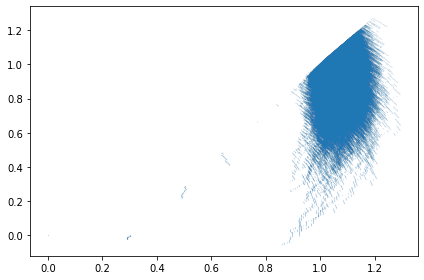

In [12]:
plt.scatter(history[:,0], history[:,1],s=.001)
#plt.axis('off')
plt.tight_layout()
plt.savefig('build/my_fractal.png')

In [13]:
boxes = []
for i in range(3,50):
    boxes.append(count_box(history, i, 1, 3))
boxes = np.array(boxes)

In [14]:
boxes_total = boxes[:,0]
boxes_filled = boxes[:,1]
fraction_filled = boxes_filled / boxes_total

In [15]:
def exponential(x,exponent, factor):
    return factor * x ** exponent


popt, pcov = curve_fit(exponential, boxes_total, boxes_filled)

exponent, factor = popt

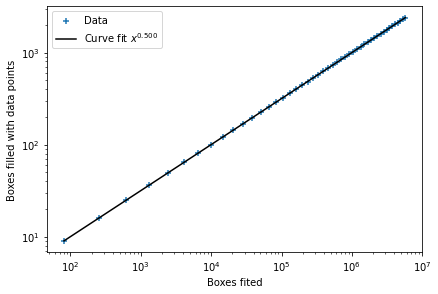

In [16]:
plt.clf()
plt.scatter(boxes_total, boxes_filled,
           label='Data',
           marker='+')
plt.plot(boxes_total, exponential(boxes_total, exponent, factor),
         label=rf'Curve fit $x^{{{exponent:.3f}}}$',
         color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.xlabel('Boxes fited')
plt.ylabel('Boxes filled with data points')

plt.savefig('build/my_fractal_dimension.png')